#### Problem

Predict the presence or absence of cardiovascular disease (CVD) using the patient examination results.

#### Data description

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

In [58]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [60]:
df = pd.read_csv('dataset_mlcourse/mlbootcamp5_train.csv')
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


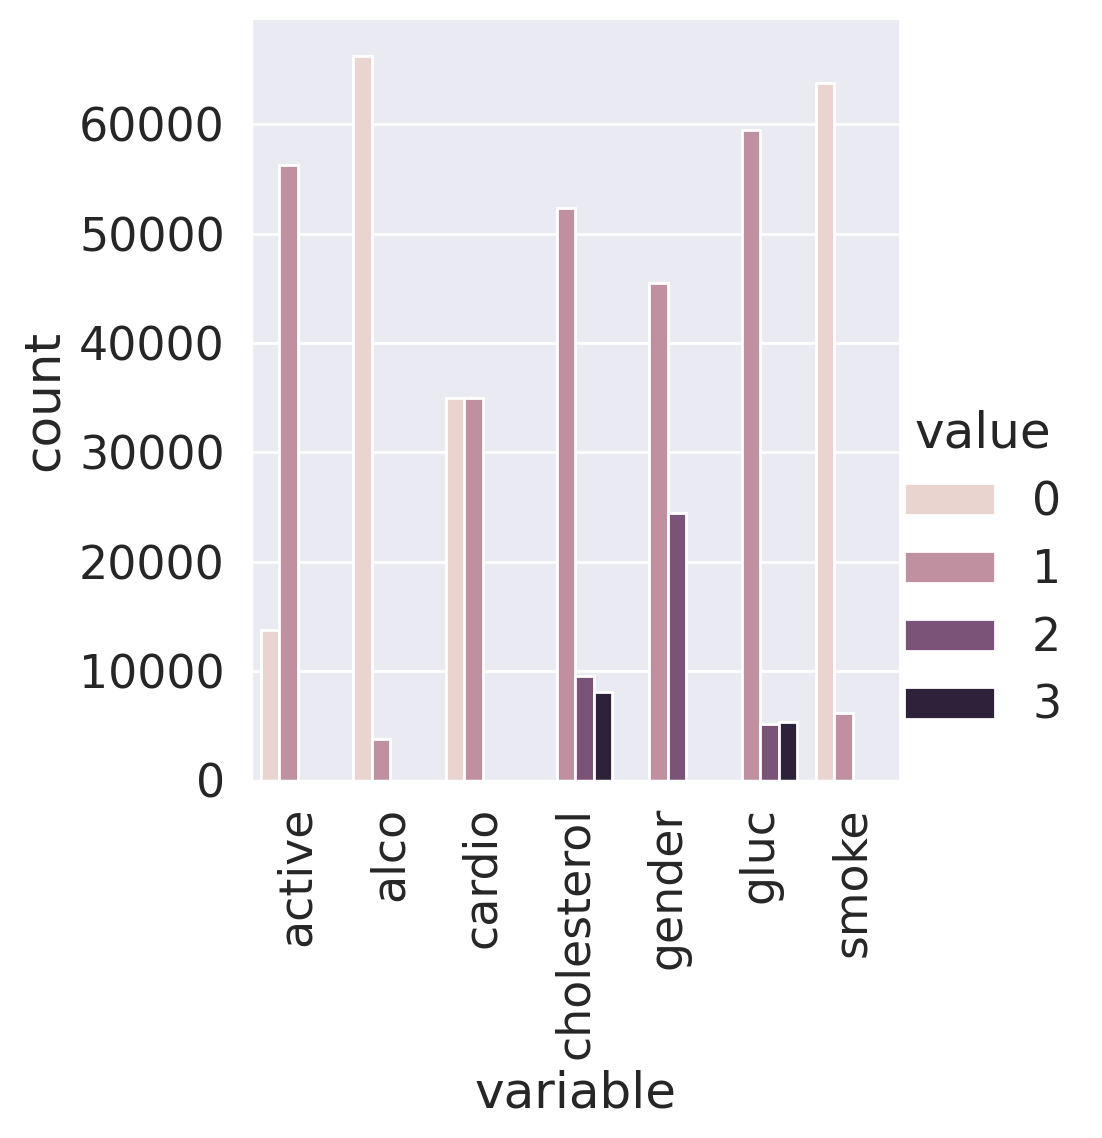

In [61]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

In [62]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In [63]:
# lets find out if lower average is men or women
x = df.sort_values(by="height")
df[x.height < x.height.mean()]

# 1 is lower than average so its women height

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69989,99985,21013,1,157,83.0,120,70,1,1,0,0,1,1
69991,99988,20609,1,159,72.0,130,90,2,2,0,0,1,0
69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1


In [64]:
# numer of women
df[df["gender"] == 1]["gender"].value_counts()

gender
1    45530
Name: count, dtype: int64

In [65]:
df.groupby("gender")["alco"].mean() 
# men

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

In [66]:
round((df.loc[df["gender"] == 2, "smoke"].mean() - df.loc[df["gender"] == 1, "smoke"].mean()) * 100)

20

In [67]:
df.groupby("smoke")["age"].median() / 30

# we can see is 20 months

smoke
0    657.4
1    637.5
Name: age, dtype: float64

In [68]:
# lets do it in code

abs(df[ df["smoke"] == 1]["age"].median() - df[ df["smoke"] == 0]["age"].median() ) / 30

# A 20

19.9

On the website for the European Society of Cardiology, a [SCORE scale](https://www.escardio.org/Education/Practice-Tools/CVD-prevention-toolbox/SCORE-Risk-Charts) is provided. It is used for calculating the risk of death from a cardiovascular decease in the next 10 years. Here it is:
<img src=https://habrastorage.org/webt/ik/gx/hr/ikgxhr3w1vzqihgitgrbdorfb14.png width=30%>

Let's take a look at the upper-right rectangle, which shows a subset of smoking men aged from 60 to 65. (It's not obvious, but the values in the figure represent the upper bound).

We see the value 9 in the lower-left corner of the rectangle and 47 in the upper-right. This means that, for people in this gender-age group whose systolic pressure is less than 120, the risk of a CVD is estimated to be 5 times lower than for those with the pressure in the interval [160,180).

Let's calculate that same ratio using our data.

Clarifications:
- Calculate ``age_years`` feature – round age to the nearest number of years. For this task, select only the people of age 60 to 64, inclusive.
- Cholesterol level categories differ between the figure and our dataset. The conversion for the ``cholesterol`` feature is as follows: 4 mmol/l $\rightarrow$ 1, 5-7 mmol/l $\rightarrow$ 2, 8 mmol/l $\rightarrow$ 3.

In [69]:
# You code here
df["age_years"] = (df["age"] / 365.25).round().astype("int")
df["age_years"].max()
smoking_old_men = df[
    (df["gender"] == 2)
    & (df["age_years"] >= 60)
    & (df["age_years"] < 65)
    & (df["smoke"] == 1)
]

smoking_old_men

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
19,29,21755,2,162,56.0,120,70,1,1,1,0,1,0,60
38,52,23388,2,162,72.0,130,80,1,1,1,0,1,1,64
67,90,22099,2,171,97.0,150,100,3,1,1,0,1,1,61
177,240,21848,2,170,69.0,120,80,1,1,1,1,1,0,60
182,248,22671,2,174,74.0,130,80,3,1,1,0,1,1,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69697,99551,23224,2,151,45.0,120,70,3,1,1,1,0,1,64
69699,99553,23183,2,178,113.0,130,90,2,2,1,0,1,1,63
69814,99711,22759,2,167,76.0,120,80,1,1,1,0,1,0,62
69857,99775,22637,2,177,63.0,150,70,1,1,1,0,1,1,62


In [70]:
# You code here
df["BMI"] = df['weight'] / ((df['height'] / 100) ** 2)

df.groupby("gender")["BMI"].median()

#Answer :  no 2 is correct -> women have higher bmi on average

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

In [71]:
# create new frame by filtering out initial frame based on required parameters
#df_clean = df[ 
    #(df["ap_lo"] < df["ap_hi"]) | 
    #(df["height"] > df["height"].quantile(0.025)) | 
    #(df["height"] < df["height"].quantile(0.975)) |
    #(df["weight"] > df["weight"].quantile(0.025)) | 
    #(df["weight"] < df["weight"].quantile(0.975))
#]

# above solution gives correct filtered dataframe, but we cant calculate how many things we removed
df_clean = df[
    (df["ap_lo"] > df["ap_hi"])
    | (df["height"] < df["height"].quantile(0.025))
    | (df["height"] > df["height"].quantile(0.975))
    | (df["weight"] < df["weight"].quantile(0.025))
    | (df["weight"] > df["weight"].quantile(0.975))
]
print(df_clean.shape[0] / df.shape[0] * 100)

filtered_df = df[~df.index.isin(df_clean)]
# Q1.7 
#10%

9.629999999999999


<Axes: >

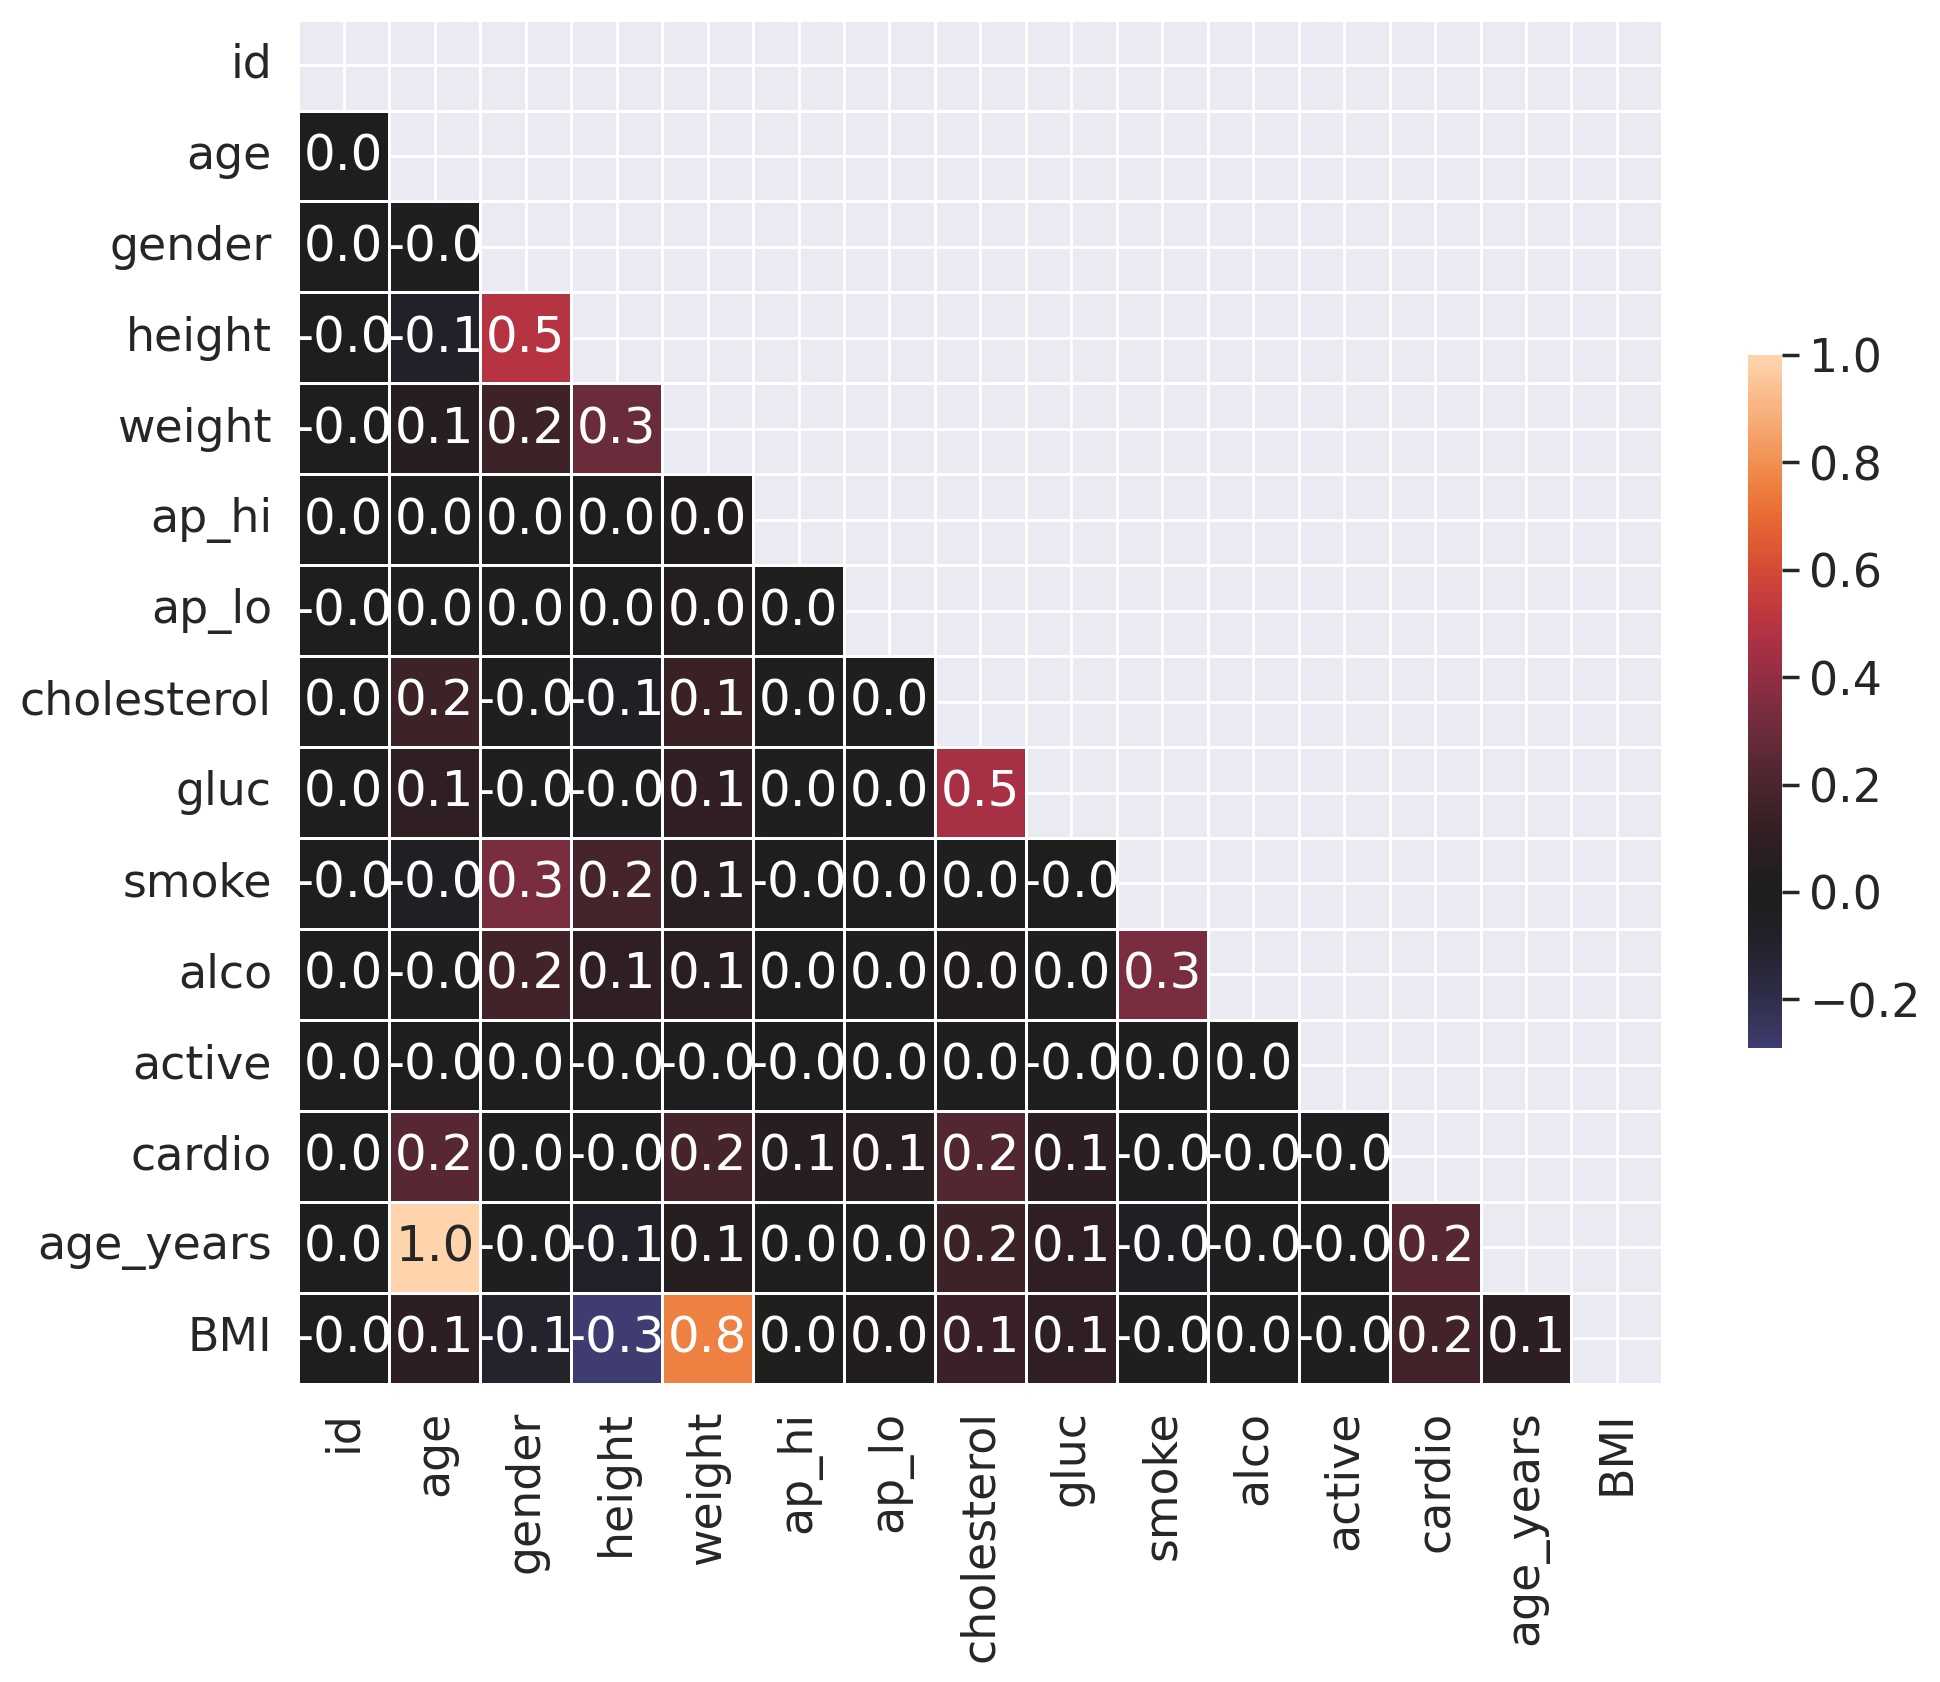

In [72]:
df = filtered_df.copy()

# (followed steps from seaborn documentation)
# compute correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#cmap =  sns.diverging_palette(250,10, 80, 50, center='dark')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,fmt=".1f", vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



#Answer: Smoke and height have the strongest correlation

<Axes: xlabel='variable', ylabel='value'>

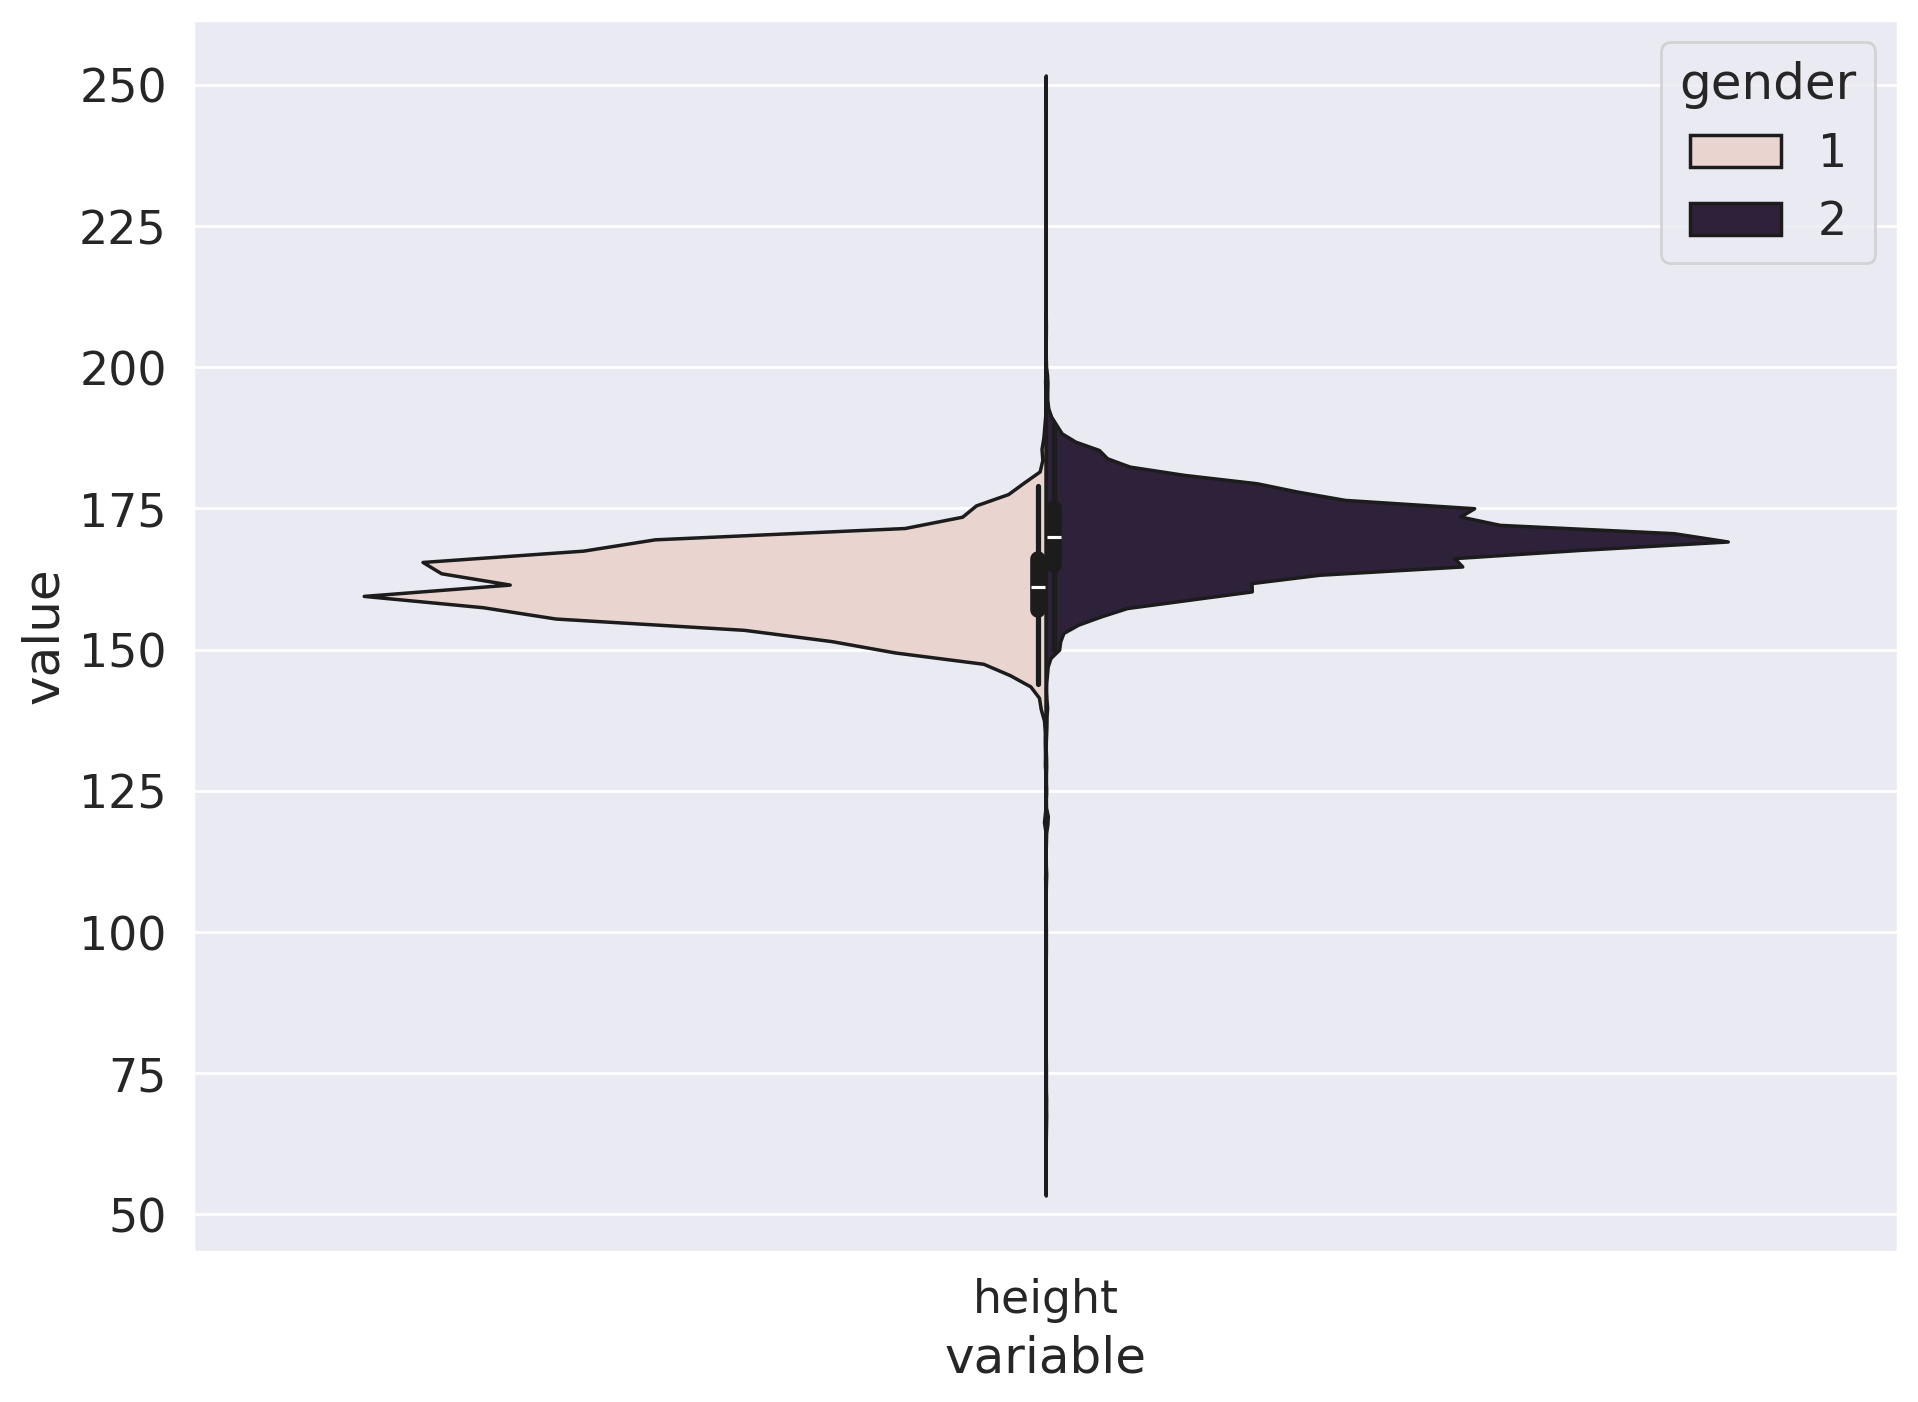

In [73]:
df_melted = pd.melt(df, value_vars=["height"], id_vars=["gender"])
sns.violinplot(x='variable', y='value', hue='gender', data=df_melted, split=True,)